# Credit Card Segmentation

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

#PCA
from sklearn.decomposition import PCA

#K-Means Clustering
from sklearn.cluster import KMeans

#K-Means Evaluation Metrics
from sklearn.metrics import calinski_harabaz_score,silhouette_score

#Dendrogram
import scipy.cluster.hierarchy as sch

#Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering

#### Loading Data

In [2]:
my_data = pd.read_csv("credit-card-data.csv")
my_data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


**Checking Description of Data**

In [3]:
my_data.shape

(8950, 18)

In [4]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

In [5]:
my_data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


### Missing Value Analysis

In [6]:
my_data.isna().sum().sort_values()

CUST_ID                               0
PAYMENTS                              0
PURCHASES_TRX                         0
CASH_ADVANCE_TRX                      0
CASH_ADVANCE_FREQUENCY                0
PURCHASES_INSTALLMENTS_FREQUENCY      0
PRC_FULL_PAYMENT                      0
ONEOFF_PURCHASES_FREQUENCY            0
CASH_ADVANCE                          0
INSTALLMENTS_PURCHASES                0
ONEOFF_PURCHASES                      0
PURCHASES                             0
BALANCE_FREQUENCY                     0
BALANCE                               0
PURCHASES_FREQUENCY                   0
TENURE                                0
CREDIT_LIMIT                          1
MINIMUM_PAYMENTS                    313
dtype: int64

**Imputing Missing Values**

In [7]:
my_data['MINIMUM_PAYMENTS'].fillna(my_data['MINIMUM_PAYMENTS'].median(),inplace = True)
my_data['CREDIT_LIMIT'].fillna(my_data['CREDIT_LIMIT'].median(),inplace = True)

In [8]:
my_data['MINIMUM_PAYMENTS'].isna().sum()

0

In [9]:
my_data['CREDIT_LIMIT'].isna().sum()

0

In [10]:
my_data.shape

(8950, 18)

**Removing CUST_ID column**

In [11]:
my_data_id = my_data.CUST_ID
my_data.drop('CUST_ID',axis = 1 , inplace = True)

#### Cleaning Data

In [12]:
my_data.loc[my_data['BALANCE_FREQUENCY']>1,:].shape

(0, 17)

In [13]:
my_data.loc[my_data['PURCHASES_FREQUENCY']>1,:].shape

(0, 17)

In [14]:
my_data.loc[my_data['CASH_ADVANCE_FREQUENCY']>1,:].shape

(8, 17)

CASH_ADVANCE_FREQUENCY is having 8 rows with value greater than > 1. So we will remove these rows.

In [15]:
my_data = my_data.loc[my_data['CASH_ADVANCE_FREQUENCY']<= 1,:]

In [16]:
my_data.loc[my_data['CASH_ADVANCE_FREQUENCY']>1,:].shape

(0, 17)

In [17]:
my_data.shape

(8942, 17)

## Generating new KPI's

### 1. Monthly average purchase and monthly cash advance amount

In [18]:
my_data['MONTHLY_AVG_PURCHASE'] = my_data['PURCHASES']/my_data['TENURE']
my_data['MONTHLY_CASH_ADVANCE'] = my_data['CASH_ADVANCE']/my_data['TENURE']

In [19]:
my_data[['MONTHLY_AVG_PURCHASE','MONTHLY_CASH_ADVANCE']].head(3)

,MONTHLY_AVG_PURCHASE,MONTHLY_CASH_ADVANCE
0,7.950000,0.000000
1,0.000000,536.912124
2,64.430833,0.000000


### 2. Purchase by type(one-off , installments)

Here we have 4 categories: <br>
<ul>
<li> <b>None:</b> one-off purchases = 0  and installment purchases = 0 <br>
<li> <b>One-Off:</b> one-off purchases > 0  and installment purchases = 0 <br>
<li> <b>Installment:</b> one-off purchases = 0  and installment purchases > 0 <br> 
<li> <b>Both:</b> one-off purchases > 0  and installment purchases > 0 <br>

In [20]:
my_data.loc[(my_data['ONEOFF_PURCHASES']==0) & (my_data['INSTALLMENTS_PURCHASES']==0),'PURCHASE_TYPE'] = 'none'
my_data.loc[(my_data['ONEOFF_PURCHASES']> 0) & (my_data['INSTALLMENTS_PURCHASES']==0),'PURCHASE_TYPE'] = 'oneoff'
my_data.loc[(my_data['ONEOFF_PURCHASES']==0) & (my_data['INSTALLMENTS_PURCHASES']> 0),'PURCHASE_TYPE'] = 'installment'
my_data.loc[(my_data['ONEOFF_PURCHASES']> 0) & (my_data['INSTALLMENTS_PURCHASES']> 0),'PURCHASE_TYPE'] = 'both'

In [21]:
my_data[['PURCHASE_TYPE','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES']].head()

,PURCHASE_TYPE,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES
0,installment,0.00,95.4
1,none,0.00,0.0
2,oneoff,773.17,0.0
3,oneoff,1499.00,0.0
4,oneoff,16.00,0.0


In [22]:
purchase_typ_cols = ['none' , 'oneoff' , 'installment' , 'both']

**Creating Dummy columns from PURCHASE_TYPE**

In [23]:
final_df = my_data.copy()

In [24]:
final_df.shape

(8942, 20)

In [25]:
# Original dataset with categorical column converted to number type.
final_df=pd.concat([final_df,pd.get_dummies(final_df['PURCHASE_TYPE'])],axis=1)

In [26]:
final_df.shape

(8942, 24)

In [27]:
final_df.drop('PURCHASE_TYPE',axis = 1 , inplace = True)

In [28]:
final_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,MONTHLY_AVG_PURCHASE,MONTHLY_CASH_ADVANCE,both,installment,none,oneoff
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,...,201.802084,139.509787,0.000000,12,7.950000,0.000000,0,1,0,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,...,4103.032597,1072.340217,0.222222,12,0.000000,536.912124,0,0,1,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,...,622.066742,627.284787,0.000000,12,64.430833,0.000000,0,0,0,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,...,0.000000,312.343947,0.000000,12,124.916667,17.149001,0,0,0,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,...,678.334763,244.791237,0.000000,12,1.333333,0.000000,0,0,0,1


### 4. Limit usage (balance to credit limit ratio)

In [29]:
final_df['LIMIT_USAGE'] = final_df['BALANCE']/final_df['CREDIT_LIMIT']

### 5. Payment to minimum payments ratio

In [30]:
final_df['PTMP_RATIO'] = final_df['PAYMENTS']/final_df['MINIMUM_PAYMENTS']

In [31]:
final_df.head(3)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PRC_FULL_PAYMENT,TENURE,MONTHLY_AVG_PURCHASE,MONTHLY_CASH_ADVANCE,both,installment,none,oneoff,LIMIT_USAGE,PTMP_RATIO
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.0,0.083333,0.00,...,0.000000,12,7.950000,0.000000,0,1,0,0,0.040901,1.446508
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.0,0.000000,0.25,...,0.222222,12,0.000000,536.912124,0,0,1,0,0.457495,3.826241
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.0,0.000000,0.00,...,0.000000,12,64.430833,0.000000,0,0,0,1,0.332687,0.991682


In [32]:
col_names = final_df.columns
col_names

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'MONTHLY_AVG_PURCHASE', 'MONTHLY_CASH_ADVANCE', 'both',
       'installment', 'none', 'oneoff', 'LIMIT_USAGE', 'PTMP_RATIO'],
      dtype='object')

In [33]:
kpi_names = col_names[17:25]
kpi_names

Index(['MONTHLY_AVG_PURCHASE', 'MONTHLY_CASH_ADVANCE', 'both', 'installment',
       'none', 'oneoff', 'LIMIT_USAGE', 'PTMP_RATIO'],
      dtype='object')

## Exploratory Data Analysis

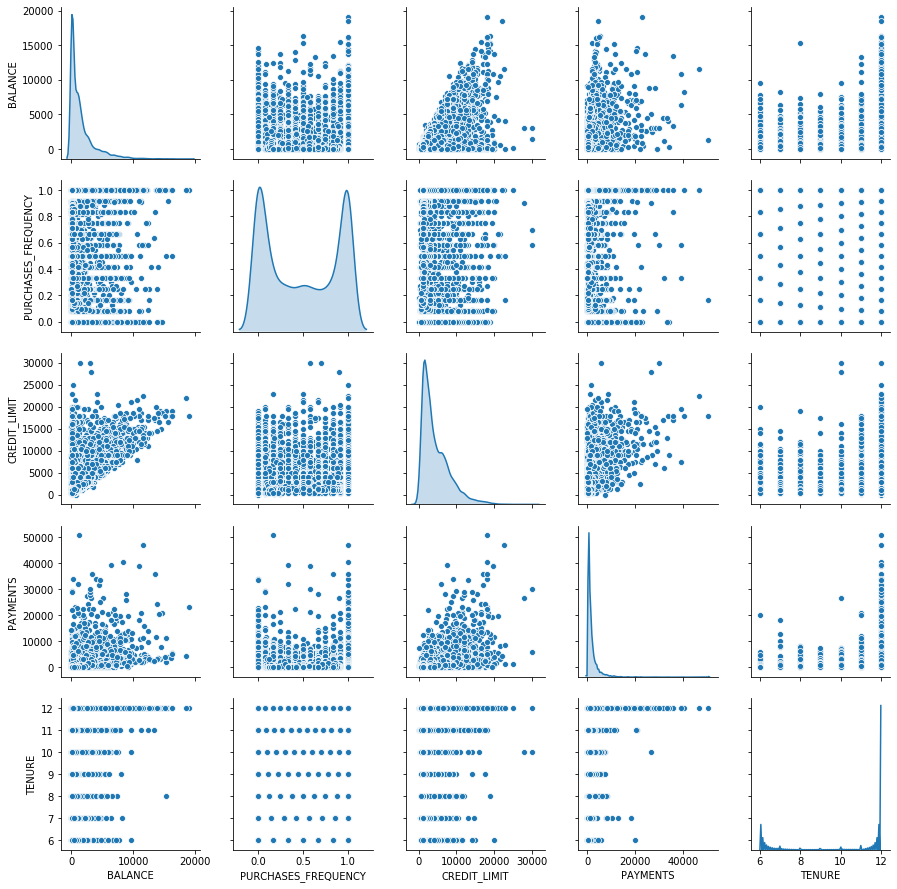

In [34]:
sns.pairplot(final_df[['BALANCE','PURCHASES_FREQUENCY','CREDIT_LIMIT','PAYMENTS' , 'TENURE']],diag_kind='kde')

**Histograms of all the variables**

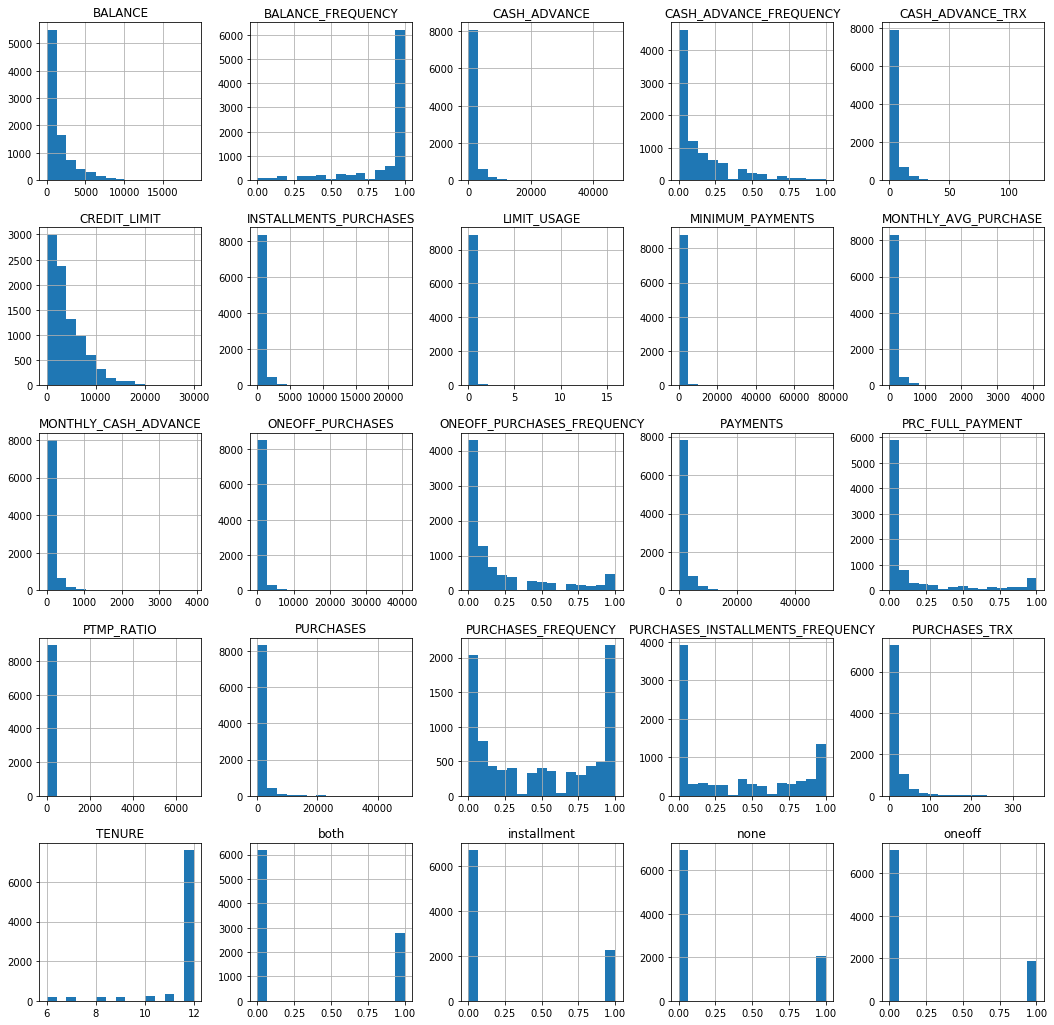

In [35]:
final_df.hist(bins=15,figsize = (18,18))
plt.savefig('Distribution.png')

## **Outlier Analysis**

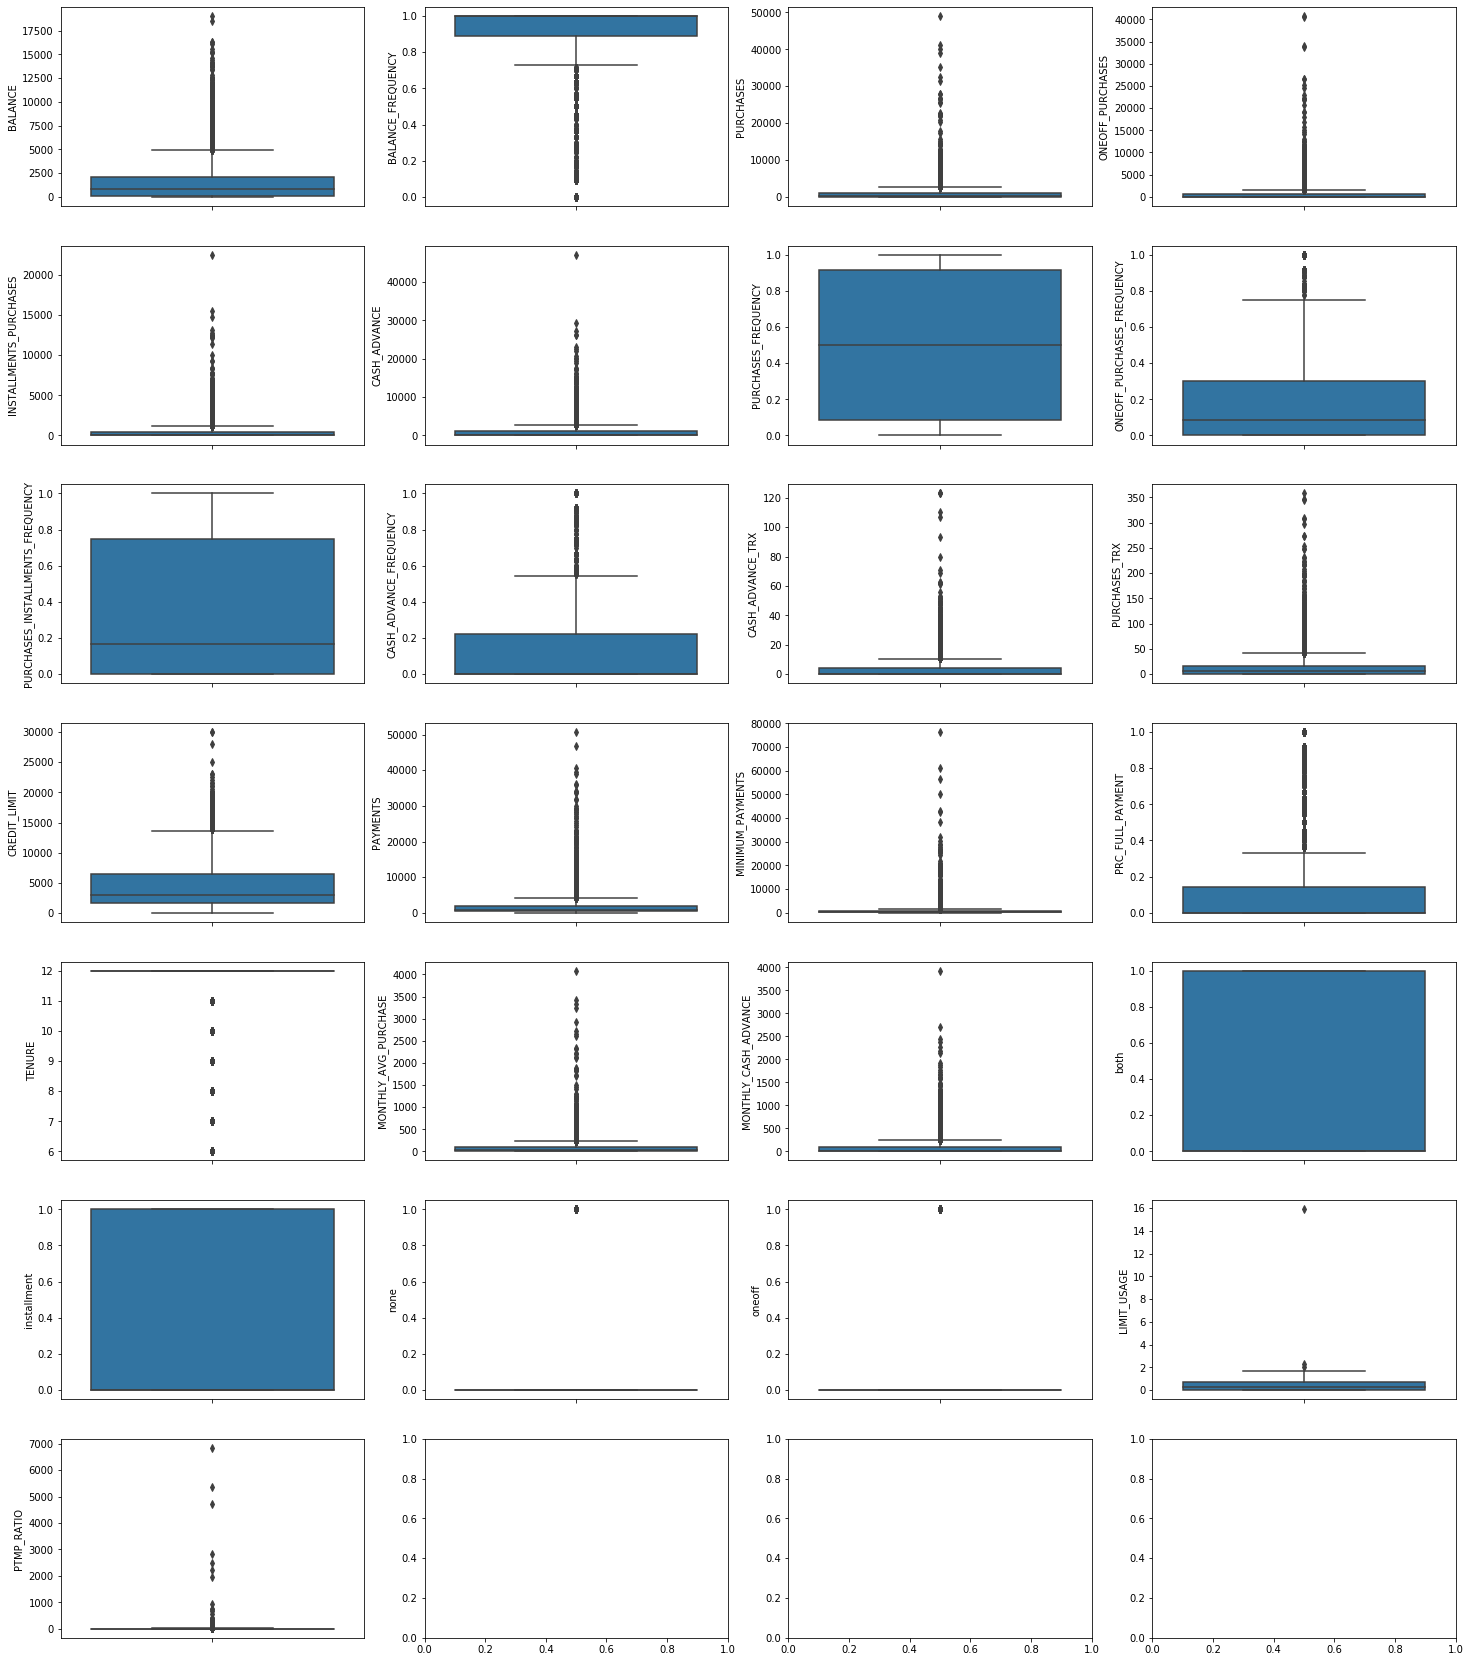

In [36]:
fig, axes = plt.subplots(nrows=7, ncols=4,figsize = (25,30))
for i,column in enumerate(col_names):
    sns.boxplot(y = final_df[column],ax = axes[i//4,i%4])
plt.savefig('Outlier.png')

**Applying Log Transforms to remove outlier effect**

In [37]:
final_df_log=final_df.applymap(lambda x: np.log(x+1))

In [38]:
final_df_log.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PRC_FULL_PAYMENT,TENURE,MONTHLY_AVG_PURCHASE,MONTHLY_CASH_ADVANCE,both,installment,none,oneoff,LIMIT_USAGE,PTMP_RATIO
0,3.735304,0.597837,4.568506,0.000000,4.568506,0.000000,0.154151,0.000000,0.080042,0.000000,...,0.000000,2.564949,2.191654,0.000000,0.0,0.693147,0.000000,0.000000,0.040086,0.894662
1,8.071989,0.646627,0.000000,0.000000,0.000000,8.770896,0.000000,0.000000,0.000000,0.223144,...,0.200671,2.564949,0.000000,6.287695,0.0,0.000000,0.693147,0.000000,0.376719,1.574068
2,7.822504,0.693147,6.651791,6.651791,0.000000,0.000000,0.693147,0.693147,0.000000,0.000000,...,0.000000,2.564949,4.180994,0.000000,0.0,0.000000,0.000000,0.693147,0.287197,0.688979
3,7.419183,0.492477,7.313220,7.313220,0.000000,5.331694,0.080042,0.080042,0.000000,0.080042,...,0.000000,2.564949,4.835620,2.898616,0.0,0.000000,0.000000,0.693147,0.200671,0.000000
4,6.707735,0.693147,2.833213,2.833213,0.000000,0.000000,0.080042,0.080042,0.000000,0.000000,...,0.000000,2.564949,0.847298,0.000000,0.0,0.000000,0.000000,0.693147,0.519644,1.327360


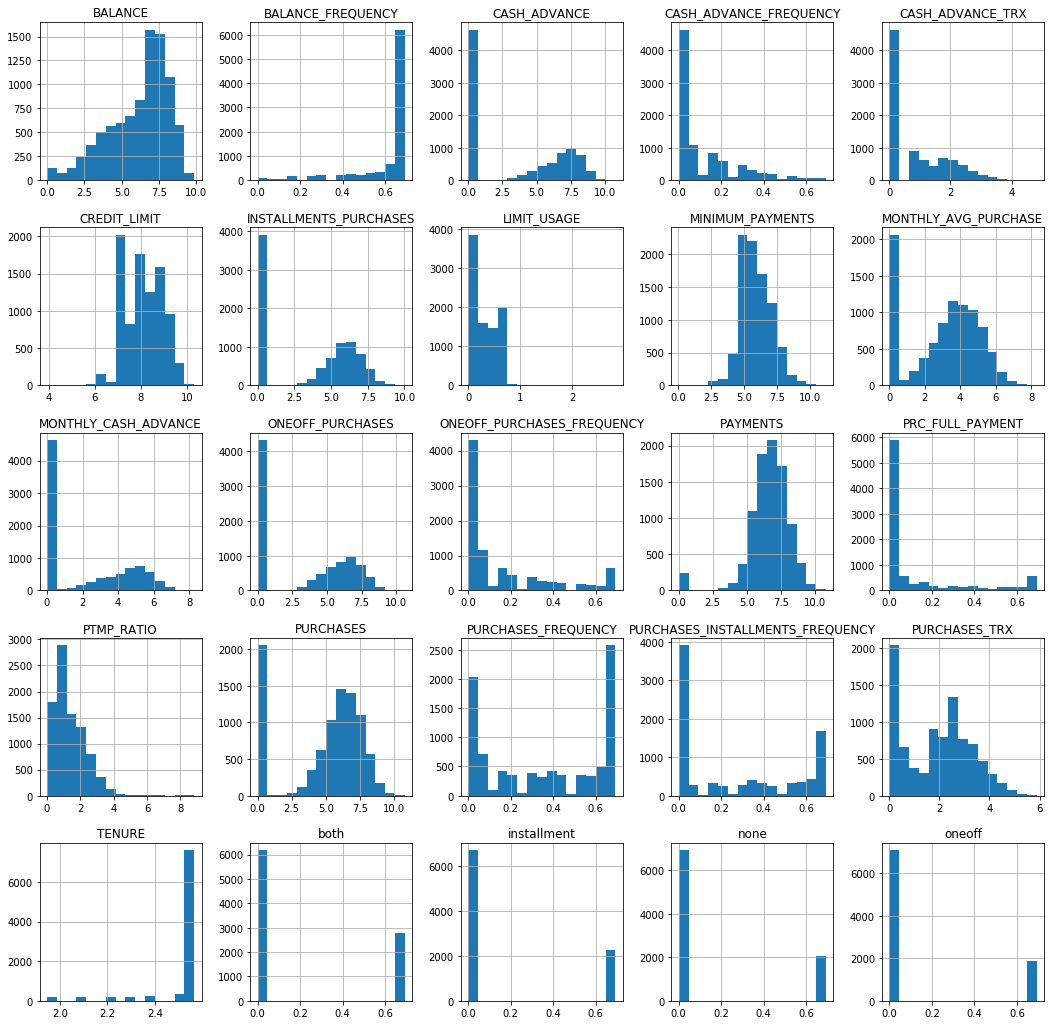

In [39]:
final_df_log.hist(bins=15,figsize = (18,18))
plt.savefig('Histograms.png')

**Normalizing Data**

In [40]:
for i in col_names:
    final_df_log[i] = (final_df_log[i] - min(final_df_log[i]))/(max(final_df_log[i])-min(final_df_log[i]))

In [41]:
final_df_log.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PRC_FULL_PAYMENT,TENURE,MONTHLY_AVG_PURCHASE,MONTHLY_CASH_ADVANCE,both,installment,none,oneoff,LIMIT_USAGE,PTMP_RATIO
0,0.379045,0.862497,0.422994,0.000000,0.455879,0.000000,0.222393,0.000000,0.115477,0.000000,...,0.000000,1.0,0.263555,0.000000,0.0,1.0,0.0,0.0,0.014175,0.101312
1,0.819116,0.932886,0.000000,0.000000,0.000000,0.815075,0.000000,0.000000,0.000000,0.321928,...,0.289506,1.0,0.000000,0.759735,0.0,0.0,1.0,0.0,0.133215,0.178248
2,0.793799,1.000000,0.615884,0.626611,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,1.0,0.502782,0.000000,0.0,0.0,0.0,1.0,0.101558,0.078020
3,0.752871,0.710494,0.677125,0.688918,0.000000,0.495472,0.115477,0.115477,0.000000,0.115477,...,0.000000,1.0,0.581503,0.350237,0.0,0.0,0.0,1.0,0.070961,0.000000
4,0.680676,1.000000,0.262325,0.266894,0.000000,0.000000,0.115477,0.115477,0.000000,0.000000,...,0.000000,1.0,0.101891,0.000000,0.0,0.0,0.0,1.0,0.183756,0.150311


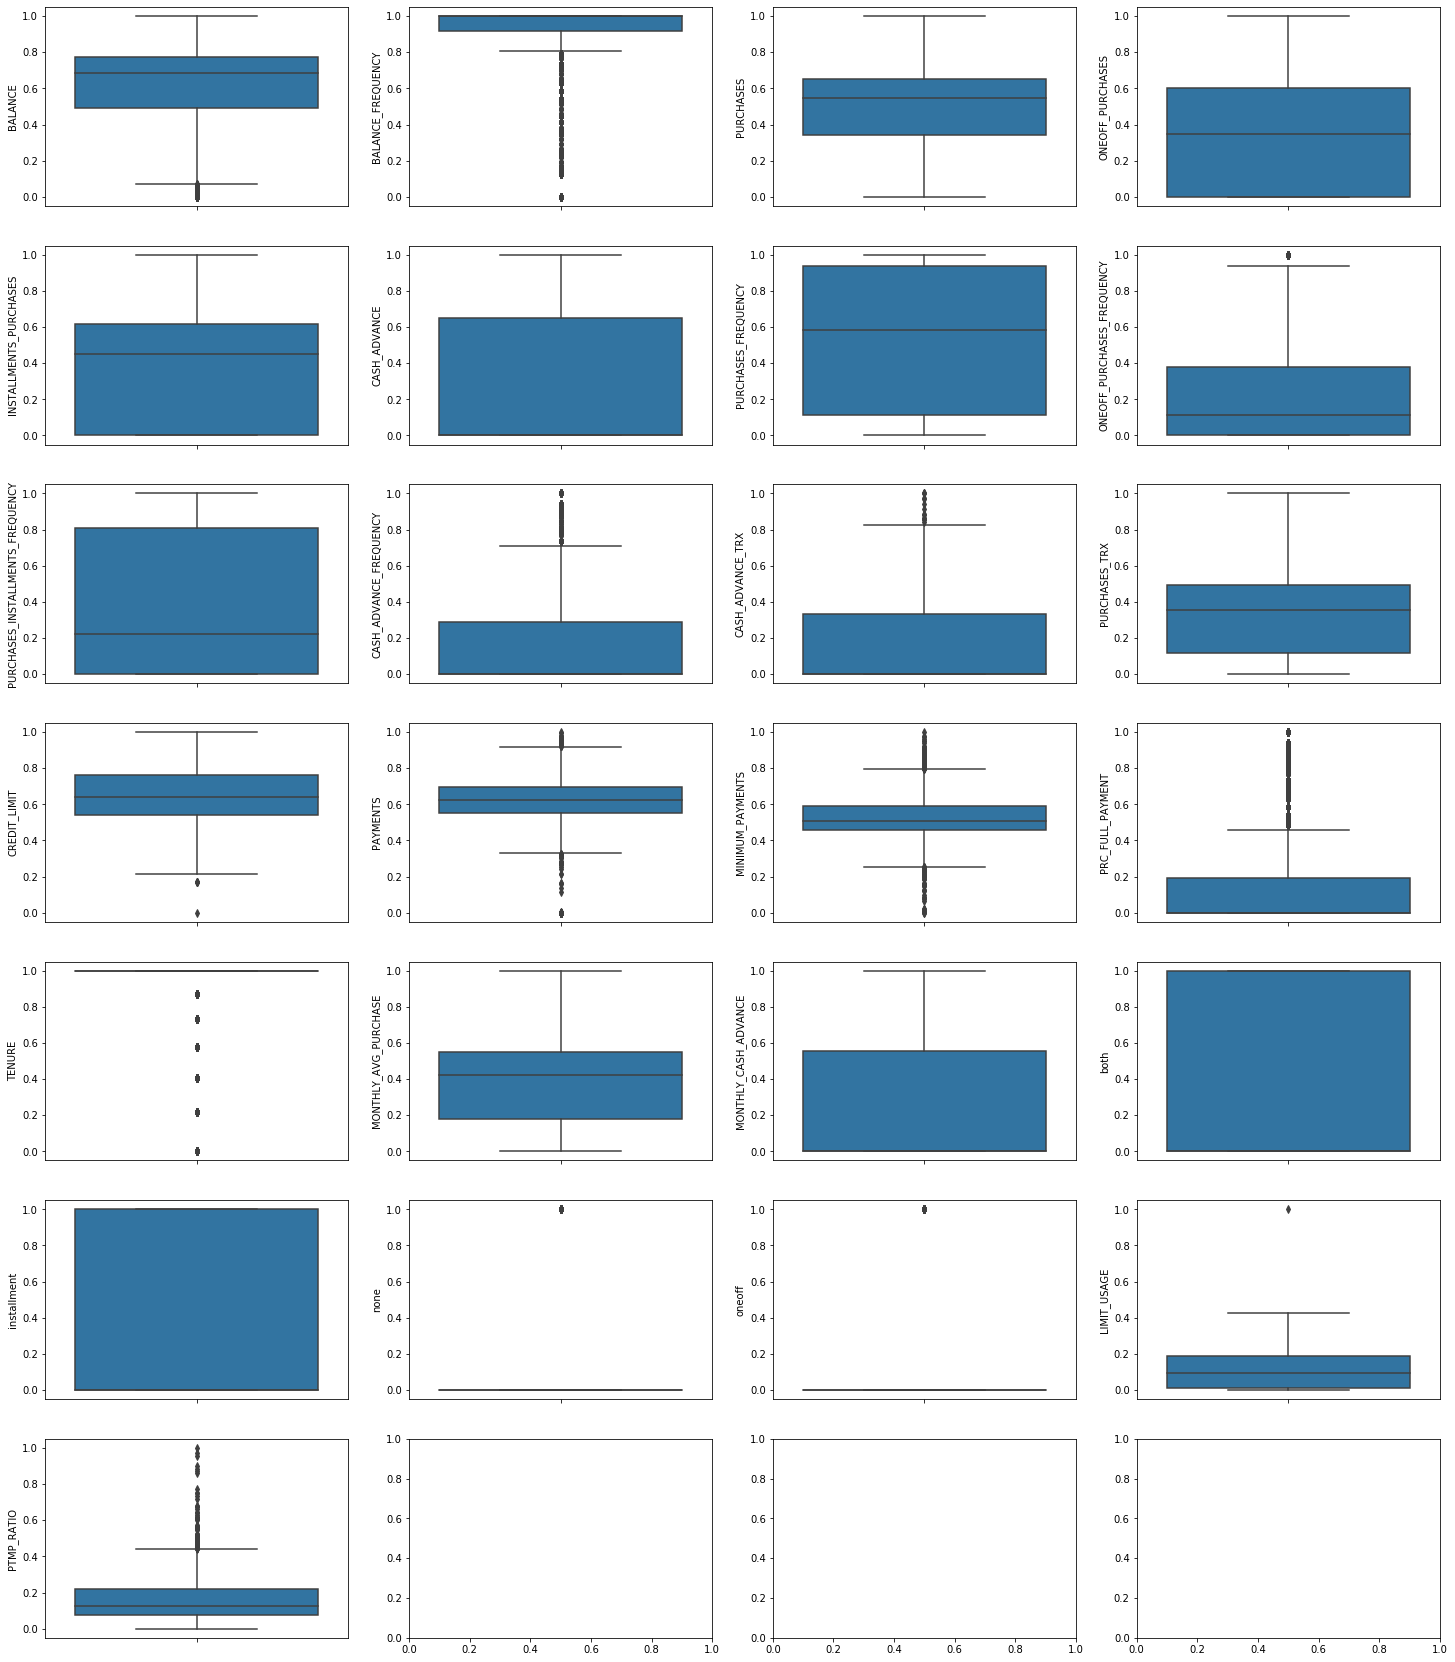

In [42]:
fig, axes = plt.subplots(nrows=7, ncols=4,figsize = (25,30))
for i,column in enumerate(col_names):
    sns.boxplot(y = final_df_log[column],ax = axes[i//4,i%4])

### **Standardization**

In [43]:
#scaled_df = final_df_log.copy()
#scaled_df = final_df.copy()
#for i in col_names:
#    print(i)
#    scaled_df[i] = (scaled_df[i] - scaled_df[i].mean())/scaled_df[i].std()

In [44]:
#scaled_df.shape

In [45]:
#scaled_df.isna().sum()

In [46]:
scaled_df = final_df_log.copy()

### Correlation Analysis

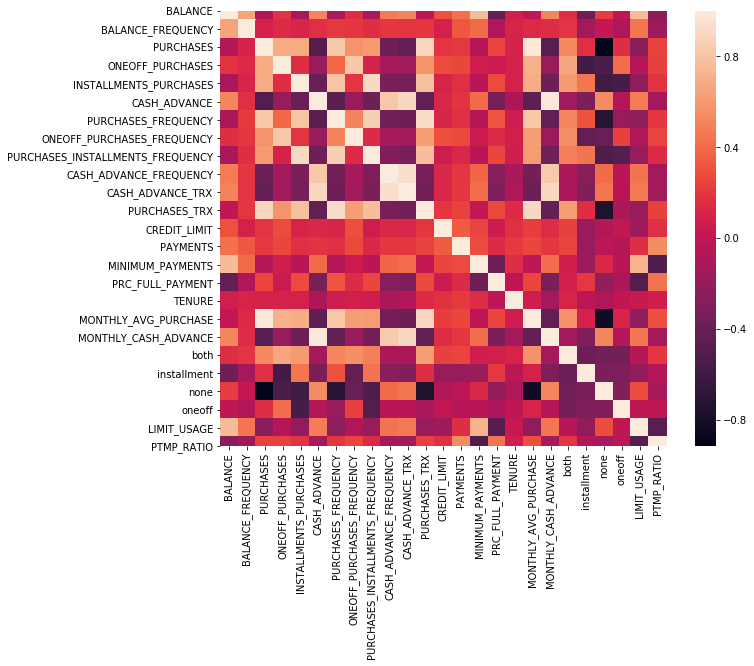

In [47]:
df_corr = scaled_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(df_corr)
plt.savefig('Correlation.png')

### Dimensionality Reduction

**Applyinng PCA**

In [48]:
from sklearn.decomposition import PCA

In [49]:
pca = PCA(n_components = None)
pca_df = pca.fit_transform(scaled_df)
explained_variance = pca.explained_variance_ratio_

In [50]:
temp = pd.DataFrame(explained_variance)
temp.columns = ['col']

In [51]:
temp.round(5)

,col
0,0.40632
1,0.19507
2,0.14850
3,0.07676
4,0.04245
5,0.03144
6,0.02241
7,0.01741
8,0.01513
9,0.01063


Text(0, 0.5, 'Proportion of variance explained by additional feature')

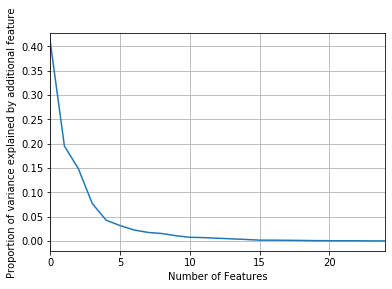

In [52]:
pd.Series(explained_variance).plot()
plt.xlabel("Number of Features")
plt.grid(True)
plt.ylabel("Proportion of variance explained by additional feature")

Since 2 variables are explaining most of the data, we will proceed with 2 principal components.

In [53]:
pca = PCA(n_components = 2)
pca_df = pca.fit_transform(scaled_df)
explained_variance = pca.explained_variance_ratio_

In [54]:
pca_df = pd.DataFrame(pca_df)
pca_df.columns = ['PCA1','PCA2']
pca_df.head(3)

,PCA1,PCA2
0,-0.101470,0.942444
1,-1.448841,-0.048343
2,0.276247,-0.684206


## Modelling

**KMeans- Model 1**

In [55]:
from sklearn.cluster import KMeans

In [56]:
pca_df.shape

(8942, 2)

In [57]:
inertia = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(pca_df)
    inertia.append(np.sqrt(kmeans.inertia_))

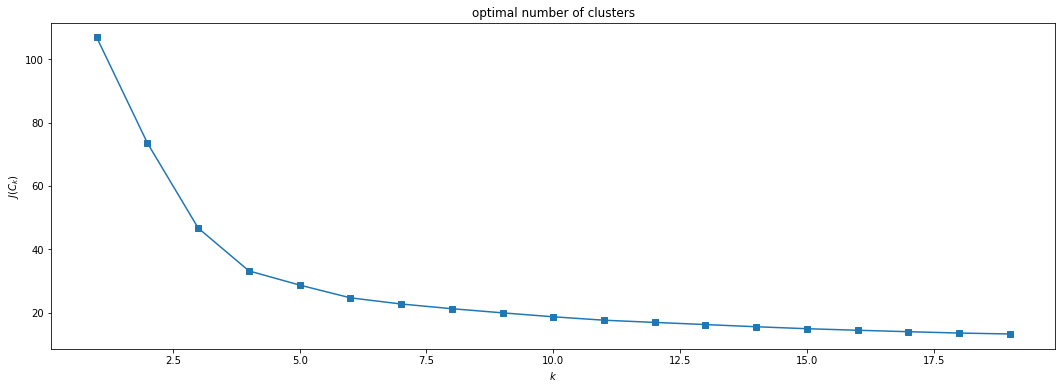

In [58]:
plt.figure(figsize=(18,6))
plt.title('optimal number of clusters')
plt.plot(range(1, 20), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');

**Since we observe an elbow like pattern at 4 , we'll consider 4 as the optimal number of clusters**

In [59]:
labels = pd.DataFrame()

In [60]:
kmeans1 = KMeans(n_clusters=4, random_state=1).fit(pca_df)
labels['labels'] = kmeans1.labels_ 

In [61]:
centers = kmeans1.cluster_centers_
centers

array([[ 0.42639715,  1.00364814],
       [-0.28009435, -0.49593116],
       [ 0.94179665, -0.4995176 ],
       [-1.39117349,  0.03157068]])

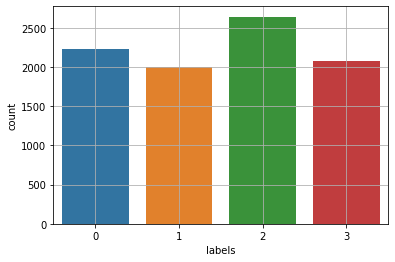

In [62]:
sns.countplot(labels.labels)
plt.grid(True)

In [63]:
pca_df['labels'] = labels.labels

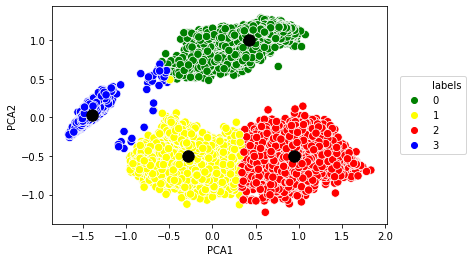

In [64]:
sns.scatterplot(x = 'PCA1' , y = 'PCA2' , hue = 'labels' , 
                data = pca_df,
               palette=['green','yellow','red','blue'], s = 70).legend(loc = 'center right', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.scatter(centers[:,0], centers[:,1], color='black' , s = 130)

In [65]:
c1_index = pca_df.loc[pca_df['labels']==0,:].index
c2_index = pca_df.loc[pca_df['labels']==1,:].index
c3_index = pca_df.loc[pca_df['labels']==2,:].index
c4_index = pca_df.loc[pca_df['labels']==3,:].index

In [66]:
cluster1 = scaled_df.iloc[c1_index]
cluster2 = scaled_df.iloc[c2_index]
cluster3 = scaled_df.iloc[c3_index]
cluster4 = scaled_df.iloc[c4_index]

In [67]:
imp_features = ['MONTHLY_AVG_PURCHASE', 'MONTHLY_CASH_ADVANCE', 'both', 'installment',
       'none', 'oneoff', 'LIMIT_USAGE', 'PTMP_RATIO' , 'PURCHASES_FREQUENCY']

In [68]:
cluster_details = pd.DataFrame(imp_features)
cluster_details.columns = ['KPI']

In [69]:
cluster_details

,KPI
0,MONTHLY_AVG_PURCHASE
1,MONTHLY_CASH_ADVANCE
2,both
3,installment
4,none
5,oneoff
6,LIMIT_USAGE
7,PTMP_RATIO
8,PURCHASES_FREQUENCY


In [70]:
cluster_details['C1'] = cluster1[['MONTHLY_AVG_PURCHASE', 'MONTHLY_CASH_ADVANCE', 'both', 'installment',
       'none', 'oneoff', 'LIMIT_USAGE', 'PTMP_RATIO','PURCHASES_FREQUENCY']].mean().values
cluster_details['C2'] = cluster2[['MONTHLY_AVG_PURCHASE', 'MONTHLY_CASH_ADVANCE', 'both', 'installment',
       'none', 'oneoff', 'LIMIT_USAGE', 'PTMP_RATIO','PURCHASES_FREQUENCY']].mean().values
cluster_details['C3'] = cluster3[['MONTHLY_AVG_PURCHASE', 'MONTHLY_CASH_ADVANCE', 'both', 'installment',
       'none', 'oneoff', 'LIMIT_USAGE', 'PTMP_RATIO','PURCHASES_FREQUENCY']].mean().values
cluster_details['C4'] = cluster4[['MONTHLY_AVG_PURCHASE', 'MONTHLY_CASH_ADVANCE', 'both', 'installment',
       'none', 'oneoff', 'LIMIT_USAGE', 'PTMP_RATIO','PURCHASES_FREQUENCY']].mean().values

In [71]:
cluster_details.index = cluster_details['KPI']

In [72]:
cluster_details.drop('KPI',axis = 1 , inplace = True)

In [73]:
cluster_details

,C1,C2,C3,C4
KPI,,,,
MONTHLY_AVG_PURCHASE,0.406308,0.408433,0.588922,0.002282
MONTHLY_CASH_ADVANCE,0.105395,0.269745,0.165986,0.541351
both,0.000000,0.117352,0.962121,0.000000
installment,1.000000,0.000502,0.000000,0.012054
none,0.000000,0.000000,0.000000,0.983124
oneoff,0.000000,0.882146,0.037879,0.004822
LIMIT_USAGE,0.071128,0.110735,0.091934,0.150988
PTMP_RATIO,0.141509,0.141023,0.193241,0.129091
PURCHASES_FREQUENCY,0.741111,0.350824,0.872005,0.002875


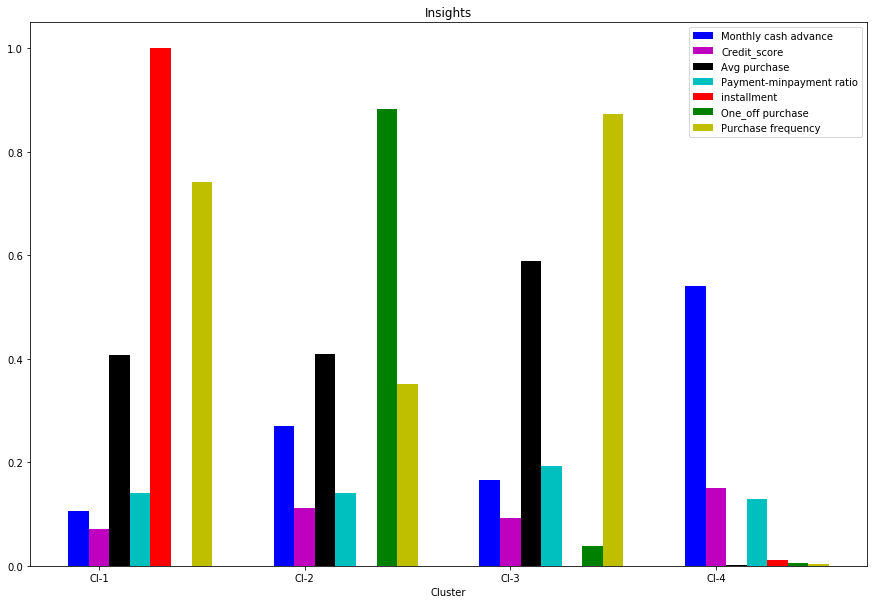

In [74]:
fig,ax=plt.subplots(figsize=(15,10))
index=np.arange(len(cluster_details.columns))

cash_advance=(cluster_details.loc['MONTHLY_CASH_ADVANCE',:].values)
credit_score=(cluster_details.loc['LIMIT_USAGE',:].values)
purchase= (cluster_details.loc['MONTHLY_AVG_PURCHASE',:].values)
payment=cluster_details.loc['PTMP_RATIO',:].values
installment=cluster_details.loc['installment',:].values
one_off=cluster_details.loc['oneoff',:].values
purchase_freq = cluster_details.loc['PURCHASES_FREQUENCY'].values


bar_width=.10
b1=plt.bar(index,cash_advance,color='b',label='Monthly cash advance',width=bar_width)
b2=plt.bar(index+bar_width,credit_score,color='m',label='Credit_score',width=bar_width)
b3=plt.bar(index+2*bar_width,purchase,color='k',label='Avg purchase',width=bar_width)
b4=plt.bar(index+3*bar_width,payment,color='c',label='Payment-minpayment ratio',width=bar_width)
b5=plt.bar(index+4*bar_width,installment,color='r',label='installment',width=bar_width)
b6=plt.bar(index+5*bar_width,one_off,color='g',label='One_off purchase',width=bar_width)
b7=plt.bar(index+6*bar_width,purchase_freq,color='y',label='Purchase frequency',width=bar_width)

plt.xlabel("Cluster")
plt.title("Insights")
plt.xticks(index + bar_width, ('Cl-1', 'Cl-2', 'Cl-3', 'Cl-4'))
plt.legend()
plt.savefig('4 Clusters.png')

<b> Cl -1 : </b>Only Installment Purchases<br>
<b> Cl -2 : </b>Only Oneoff Purchases<br>
<b> Cl -3 : </b>Very high purchase frequency and highest average purchase<br>
<b> Cl -4 : </b>Very Low Purchase and Purchase Frequency but high Cash Advance<br>

## K Means with 5 Clusters

In [75]:
pca_df.drop('labels', axis = 1 , inplace = True)

In [76]:
kmeans2 = KMeans(n_clusters=5, random_state=1).fit(pca_df)
labels['labels'] = kmeans2.labels_ 
centers = kmeans2.cluster_centers_
centers

array([[ 1.1220269 , -0.47121418],
       [-1.39385931,  0.03118326],
       [ 0.427182  ,  1.00407886],
       [-0.43286041, -0.45712248],
       [ 0.40850189, -0.57329741]])

In [77]:
pca_df['labels'] = labels.labels

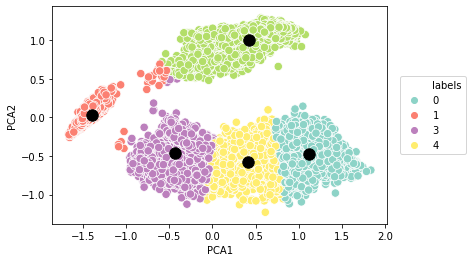

In [78]:
sns.scatterplot(x = 'PCA1' , y = 'PCA2' , hue = 'labels' , 
                data = pca_df,
               palette='Set3', s = 70).legend(loc = 'center right', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.scatter(centers[:,0], centers[:,1], color='black' , s = 130)

In [79]:
c1_index = pca_df.loc[pca_df['labels']==0,:].index
c2_index = pca_df.loc[pca_df['labels']==1,:].index
c3_index = pca_df.loc[pca_df['labels']==2,:].index
c4_index = pca_df.loc[pca_df['labels']==3,:].index
c5_index = pca_df.loc[pca_df['labels']==4,:].index

In [80]:
cluster1 = scaled_df.iloc[c1_index]
cluster2 = scaled_df.iloc[c2_index]
cluster3 = scaled_df.iloc[c3_index]
cluster4 = scaled_df.iloc[c4_index]
cluster5 = scaled_df.iloc[c5_index]

In [81]:
cluster_details2 = pd.DataFrame(imp_features)
cluster_details2.columns = ['KPI']

In [82]:
cluster_details2['C1'] = cluster1[['MONTHLY_AVG_PURCHASE', 'MONTHLY_CASH_ADVANCE', 'both', 'installment',
       'none', 'oneoff', 'LIMIT_USAGE', 'PTMP_RATIO','PURCHASES_FREQUENCY']].mean().values
cluster_details2['C2'] = cluster2[['MONTHLY_AVG_PURCHASE', 'MONTHLY_CASH_ADVANCE', 'both', 'installment',
       'none', 'oneoff', 'LIMIT_USAGE', 'PTMP_RATIO','PURCHASES_FREQUENCY']].mean().values
cluster_details2['C3'] = cluster3[['MONTHLY_AVG_PURCHASE', 'MONTHLY_CASH_ADVANCE', 'both', 'installment',
       'none', 'oneoff', 'LIMIT_USAGE', 'PTMP_RATIO','PURCHASES_FREQUENCY']].mean().values
cluster_details2['C4'] = cluster4[['MONTHLY_AVG_PURCHASE', 'MONTHLY_CASH_ADVANCE', 'both', 'installment',
       'none', 'oneoff', 'LIMIT_USAGE', 'PTMP_RATIO','PURCHASES_FREQUENCY']].mean().values
cluster_details2['C5'] = cluster5[['MONTHLY_AVG_PURCHASE', 'MONTHLY_CASH_ADVANCE', 'both', 'installment',
       'none', 'oneoff', 'LIMIT_USAGE', 'PTMP_RATIO','PURCHASES_FREQUENCY']].mean().values

In [83]:
cluster_details2.index = cluster_details2['KPI']
cluster_details2.drop('KPI',axis = 1 , inplace = True)
cluster_details2

,C1,C2,C3,C4,C5
KPI,,,,,
MONTHLY_AVG_PURCHASE,0.618439,0.001938,0.406415,0.378849,0.511412
MONTHLY_CASH_ADVANCE,0.098304,0.541642,0.104874,0.281851,0.284079
both,1.000000,0.000000,0.000000,0.014775,0.702143
installment,0.000000,0.010649,1.000000,0.004030,0.000000
none,0.000000,0.986931,0.000000,0.000000,0.000000
oneoff,0.000000,0.002420,0.000000,0.981195,0.297857
LIMIT_USAGE,0.081460,0.151161,0.071009,0.111732,0.112055
PTMP_RATIO,0.209502,0.129001,0.141574,0.135242,0.158030
PURCHASES_FREQUENCY,0.935113,0.002068,0.741486,0.252859,0.696518


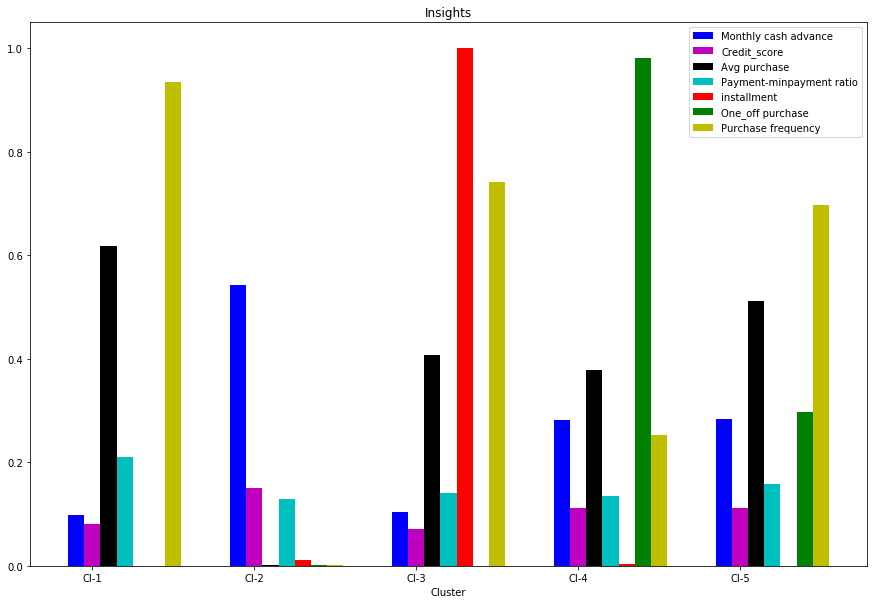

In [84]:
fig,ax=plt.subplots(figsize=(15,10))
index=np.arange(len(cluster_details2.columns))

cash_advance=(cluster_details2.loc['MONTHLY_CASH_ADVANCE',:].values)
credit_score=(cluster_details2.loc['LIMIT_USAGE',:].values)
purchase= (cluster_details2.loc['MONTHLY_AVG_PURCHASE',:].values)
payment=cluster_details2.loc['PTMP_RATIO',:].values
installment=cluster_details2.loc['installment',:].values
one_off=cluster_details2.loc['oneoff',:].values
purchase_freq = cluster_details2.loc['PURCHASES_FREQUENCY'].values


bar_width=.10
b1=plt.bar(index,cash_advance,color='b',label='Monthly cash advance',width=bar_width)
b2=plt.bar(index+bar_width,credit_score,color='m',label='Credit_score',width=bar_width)
b3=plt.bar(index+2*bar_width,purchase,color='k',label='Avg purchase',width=bar_width)
b4=plt.bar(index+3*bar_width,payment,color='c',label='Payment-minpayment ratio',width=bar_width)
b5=plt.bar(index+4*bar_width,installment,color='r',label='installment',width=bar_width)
b6=plt.bar(index+5*bar_width,one_off,color='g',label='One_off purchase',width=bar_width)
b7=plt.bar(index+6*bar_width,purchase_freq,color='y',label='Purchase frequency',width=bar_width)

plt.xlabel("Cluster")
plt.title("Insights")
plt.xticks(index + bar_width, ('Cl-1', 'Cl-2', 'Cl-3', 'Cl-4','Cl-5'))
plt.legend()
plt.savefig('5 Clusters.png')

# Evaluating K Means 

In [85]:
from sklearn.metrics import calinski_harabaz_score,silhouette_score

In [86]:
pca_df.drop('labels', axis = 1 , inplace = True)

In [87]:
score={}
score_c={}
for n in range(3,10):
    km_score=KMeans(n_clusters=n)
    km_score.fit(pca_df)
    score_c[n]=calinski_harabaz_score(pca_df,km_score.labels_)
    score[n]=silhouette_score(pca_df,km_score.labels_)

C:\Users\Chinmay\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Chinmay\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Chinmay\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Chinmay\Anaconda3\lib\site-packages\sklearn\utils\depre

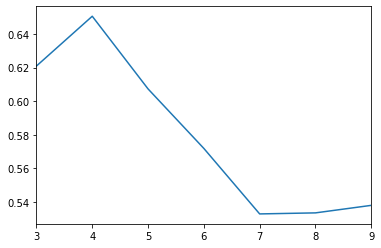

In [88]:
pd.Series(score).plot()

## Hierarchical Clustering

In [89]:
import scipy.cluster.hierarchy as sch

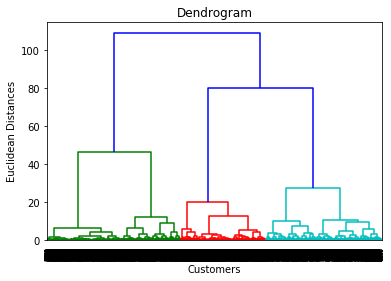

In [90]:
dendrogram = sch.dendrogram(sch.linkage(pca_df , method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show()

According to the dendogram , 4 is the optimal no. of clusters.

**Fitting hierarchical clustering model to data**

In [91]:
from sklearn.cluster import AgglomerativeClustering

In [92]:
hc = AgglomerativeClustering(n_clusters = 4 , affinity = 'euclidean' ,
                             linkage = 'ward')
y_hc = hc.fit_predict(pca_df)

In [93]:
y_hc

array([2, 3, 0, ..., 2, 3, 1], dtype=int64)

In [94]:
pca_df['labels'] = y_hc

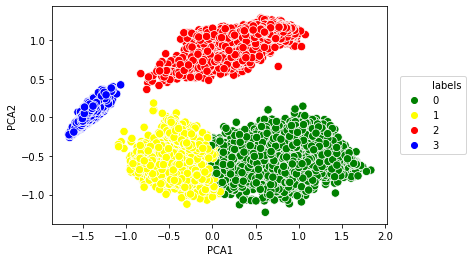

In [95]:
sns.scatterplot(x = 'PCA1' , y = 'PCA2' , hue = 'labels' , 
                data = pca_df,
               palette=['green','yellow','red','blue'], s = 70).legend(loc = 'center right', bbox_to_anchor=(1.25, 0.5), ncol=1)

**Observation:** <br>
It can be seen that this model performed exactly like the KMeans Clustering

-----------------------------------------------------------END-----------------------------------------------------------------